In [ ]:
import numpy as np
import spacy
import pandas as pd
import re,string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.pipeline import Pipeline

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import gc
from tqdm import tqdm
from sklearn.svm import SVC

from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import classification_report,f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import string

import re

%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
df

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
20963,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20964,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20965,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20966,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [ ]:
df['ABSTRACT_TITLE']=df['TITLE']+df['ABSTRACT']

In [ ]:
df

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,ABSTRACT_TITLE
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps P...
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation i...
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,A finite element approximation for the stochas...
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...
...,...,...,...,...,...,...,...,...,...
20963,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0,Contemporary machine learning: a guide for pra...
20964,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0,Uniform diamond coatings on WC-Co hard alloy c...
20965,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0,Analysing Soccer Games with Clustering and Con...
20966,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0,On the Efficient Simulation of the Left-Tail o...


In [ ]:

df.isna().sum()

TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
ABSTRACT_TITLE          0
dtype: int64

In [ ]:
for i in range(df.shape[1]):
  print(df.iloc[:,i].unique())

['Reconstructing Subject-Specific Effect Maps'
 'Rotation Invariance Neural Network'
 'Spherical polyharmonics and Poisson kernels for polyharmonic functions'
 ... 'Analysing Soccer Games with Clustering and Conceptors'
 'On the Efficient Simulation of the Left-Tail of the Sum of Correlated Log-normal Variates'
 'Why optional stopping is a problem for Bayesians']
["  Predictive models allow subject-specific inference when analyzing disease\nrelated alterations in neuroimaging data. Given a subject's data, inference can\nbe made at two levels: global, i.e. identifiying condition presence for the\nsubject, and local, i.e. detecting condition effect on each individual\nmeasurement extracted from the subject's data. While global inference is widely\nused, local inference, which can be used to form subject-specific effect maps,\nis rarely used because existing models often yield noisy detections composed of\ndispersed isolated islands. In this article, we propose a reconstruction\nmethod, n

In [ ]:
for i in range(df.shape[1]):
  print(df.iloc[:,i].value_counts())

Reconstructing Subject-Specific Effect Maps                                                                                           1
Can Deep Clinical Models Handle Real-World Domain Shifts?                                                                             1
Memory Efficient Experience Replay for Streaming Learning                                                                             1
Aspiration dynamics generate robust predictions in structured populations                                                             1
OAuthGuard: Protecting User Security and Privacy with OAuth 2.0 and OpenID Connect                                                    1
                                                                                                                                     ..
The exit time finite state projection scheme: bounding exit distributions and occupation measures of continuous-time Markov chains    1
The problem of boundary conditions for the shall

In [ ]:
df.columns

Index(['TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance',
       'ABSTRACT_TITLE'],
      dtype='object')

In [ ]:
df.describe()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
count,20968.000000,20968.000000,20968.000000,20968.000000,20968.000000,20968.000000
mean,0.409863,0.286770,0.267932,0.248283,0.027804,0.011684
std,0.491820,0.452264,0.442893,0.432027,0.164416,0.107464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['ABSTRACT_TITLE'].value_counts()

Reconstructing Subject-Specific Effect Maps  Predictive models allow subject-specific inference when analyzing disease\nrelated alterations in neuroimaging data. Given a subject's data, inference can\nbe made at two levels: global, i.e. identifiying condition presence for the\nsubject, and local, i.e. detecting condition effect on each individual\nmeasurement extracted from the subject's data. While global inference is widely\nused, local inference, which can be used to form subject-specific effect maps,\nis rarely used because existing models often yield noisy detections composed of\ndispersed isolated islands. In this article, we propose a reconstruction\nmethod, named RSM, to improve subject-specific detections of predictive\nmodeling approaches and in particular, binary classifiers. RSM specifically\naims to reduce noise due to sampling error associated with using a finite\nsample of examples to train classifiers. The proposed method is a wrapper-type\nalgorithm that can be used wi

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['ABSTRACT_TITLE']=df['ABSTRACT_TITLE'].apply(denoise_text)

In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['ABSTRACT_TITLE']=df['ABSTRACT_TITLE'].apply(remove_special_characters)

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['ABSTRACT_TITLE']=df['ABSTRACT_TITLE'].apply(simple_stemmer)

In [ ]:
df

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,ABSTRACT_TITLE
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,reconstruct subjectspecif effect map predict m...
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,rotat invari neural network rotat invari and t...
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,spheric polyharmon and poisson kernel for poly...
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,a finit element approxim for the stochast maxw...
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,compar studi of discret wavelet transform and ...
...,...,...,...,...,...,...,...,...,...
20963,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0,contemporari machin learn a guid for practitio...
20964,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0,uniform diamond coat on wcco hard alloy cut in...
20965,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0,analys soccer game with cluster and conceptor ...
20966,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0,on the effici simul of the lefttail of the sum...


In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['ABSTRACT_TITLE']=df['ABSTRACT_TITLE'].apply(remove_stopwords)

{'you', 'about', 'hadn', 'down', "hadn't", 'her', 'ours', 'he', 'after', 'll', "shan't", 'had', 'that', 'won', 'same', 'each', 'they', 'no', 'of', 'ain', 'only', 'nor', 'over', 'mustn', 'myself', 'yours', "you'll", 'now', 'out', 'o', 'have', 'does', 'were', 'from', 'before', 'ourselves', 'this', 'how', 'their', "you've", 'an', 'we', 'these', 'on', "mustn't", 'them', 'further', 'is', 'until', 'all', 'aren', 'him', 'do', "needn't", 'isn', 'she', 'shouldn', 'so', 'hasn', 'mightn', 'am', 'having', 'against', 'but', 'why', 'yourself', 'with', 'other', 'own', 'or', "shouldn't", 'as', 'your', 'whom', 'some', 'when', 'didn', 'any', 'to', "you're", 'because', 'd', "couldn't", 'up', 'has', 'too', 'for', 'its', 'haven', 'ma', 'if', "it's", 'wasn', 'again', 'our', 'those', 'the', 'who', 's', 'm', 'my', "that'll", 'once', 'here', 'few', 'wouldn', 'was', "wouldn't", 'theirs', 'himself', 'off', 'are', 'than', 'and', 'such', 'shan', 'not', 'can', 'me', 'will', "should've", "didn't", 'should', 'below',

In [ ]:
df

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,ABSTRACT_TITLE
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,reconstruct subjectspecif effect map predict m...
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,rotat invari neural network rotat invari trans...
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,spheric polyharmon poisson kernel polyharmon f...
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,finit element approxim stochast maxwelllandaul...
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,compar studi discret wavelet transform wavelet...
...,...,...,...,...,...,...,...,...,...
20963,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0,contemporari machin learn guid practition phys...
20964,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0,uniform diamond coat wcco hard alloy cut inser...
20965,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0,analys soccer game cluster conceptor present n...
20966,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0,effici simul lefttail sum correl lognorm varia...


eda

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-96-37972a0585f9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowSums = df.iloc[:,3:].sum(axis=1)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


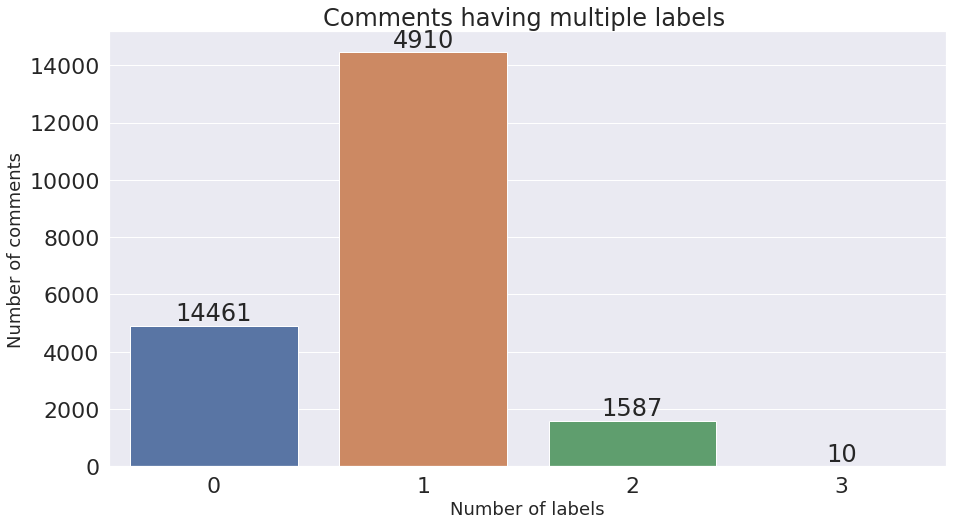

In [ ]:
rowSums = df.iloc[:,3:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

<ipython-input-97-fcbd17be4eb7>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  subject_per_entry = df.sum(axis=1)


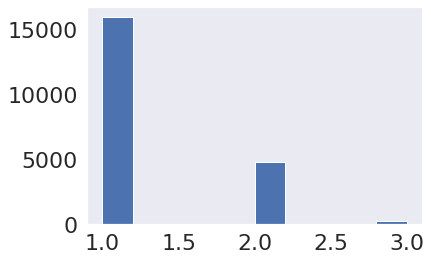

In [ ]:
df = df.drop(['TITLE', 'ABSTRACT'], axis=1)

subject_per_entry = df.sum(axis=1)
subject_per_entry.hist(grid=False)
plt.show()

Most articles are only in one category. However, there are also around 6,000 articles that consist of multiple categories.

<ipython-input-98-3af6e15d05c1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowSums = df.iloc[:,3:].sum(axis=1)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


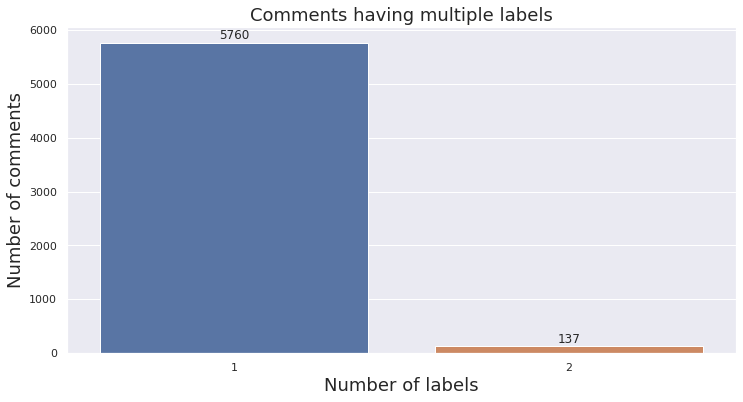

In [ ]:
rowSums = df.iloc[:,3:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 1)
plt.figure(figsize=(12,6))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels", fontsize=18)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show();

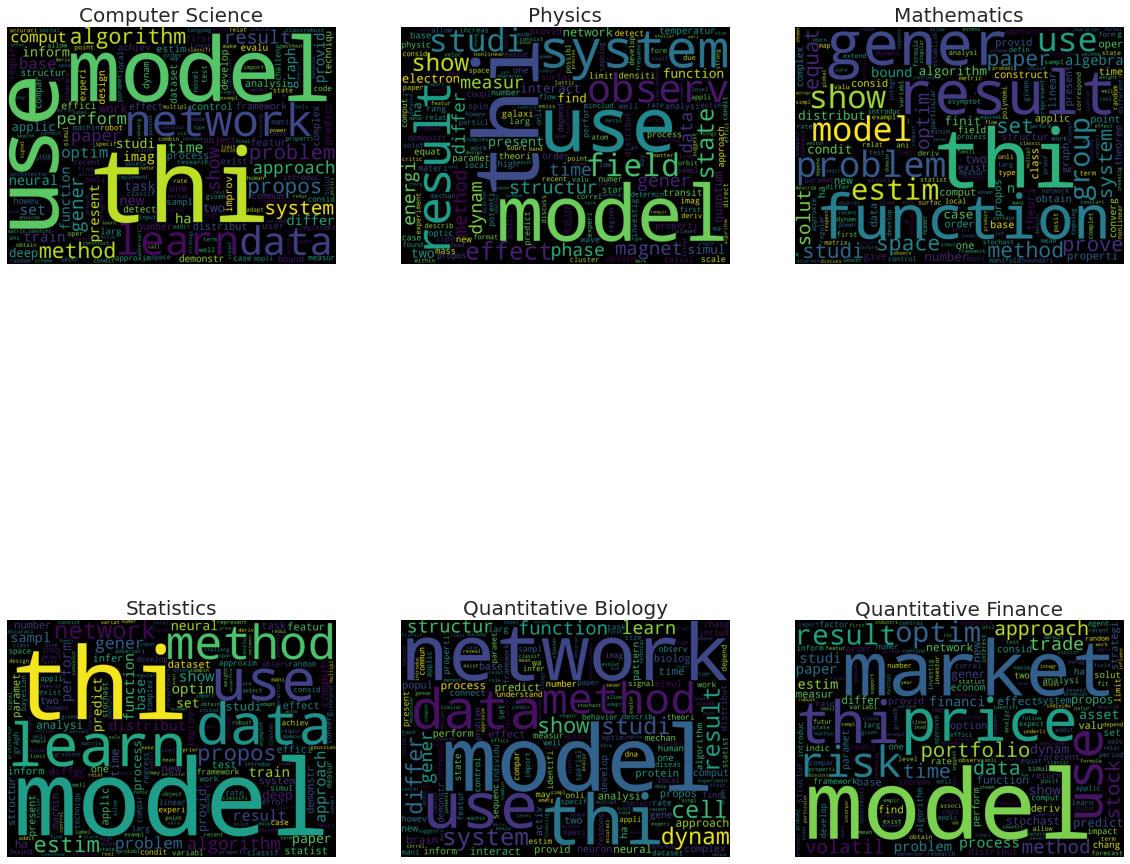

In [ ]:
plt.figure(figsize=(20,20))

# Computer Science
subset = df[df['Computer Science']==1]

text = subset.ABSTRACT_TITLE.values

cloud_computer_science = WordCloud(
                                  background_color='black',
                                  collocations=False,
                                  width=2500,
                                  height=1800
                                  ).generate(" ".join(text))
plt.subplot(2,3,1)
plt.axis('off')
plt.title('Computer Science',fontsize=20)
plt.imshow(cloud_computer_science)

# Physics
subset = df[df['Physics']==1]

text = subset.ABSTRACT_TITLE.values

cloud_Physics = WordCloud(
                                  background_color='black',
                                  collocations=False,
                                  width=2500,
                                  height=1800
                         ).generate(" ".join(text))

plt.subplot(2,3,2)
plt.axis('off')
plt.title('Physics',fontsize=20)
plt.imshow(cloud_Physics)

# Mathematics
subset = df[df['Mathematics']==1]

text = subset.ABSTRACT_TITLE.values

cloud_Maths = WordCloud(
                                  background_color='black',
                                  collocations=False,
                                  width=2500,
                                  height=1800
                         ).generate(" ".join(text))

plt.subplot(2,3,3)
plt.axis('off')
plt.title('Mathematics',fontsize=20)
plt.imshow(cloud_Maths)

# Statistics
subset = df[df['Statistics']==1]

text = subset.ABSTRACT_TITLE.values

cloud_stats = WordCloud(
                       background_color='black',
                        collocations=False,
                        width=2500,
                        height=1800
                        ).generate(" ".join(text))

plt.subplot(2,3,4)
plt.axis('off')
plt.title('Statistics',fontsize=20)
plt.imshow(cloud_stats)
# Quantitative Biology
subset = df[df['Quantitative Biology']==1]

text = subset.ABSTRACT_TITLE.values

cloud_quant_bio = WordCloud(
                       background_color='black',
                        collocations=False,
                        width=2500,
                        height=1800
                        ).generate(" ".join(text))

plt.subplot(2,3,5)
plt.axis('off')
plt.title('Quantitative Biology',fontsize=20)
plt.imshow(cloud_quant_bio)

# Quantitative Finance
subset = df[df['Quantitative Finance']==1]

text = subset.ABSTRACT_TITLE.values

cloud_quant_Fin = WordCloud(
                       background_color='black',
                        collocations=False,
                        width=2500,
                        height=1800
                        ).generate(" ".join(text))

plt.subplot(2,3,6)
plt.axis('off')
plt.title('Quantitative Finance',fontsize=20)
plt.imshow(cloud_quant_Fin)

plt.show()

WordCloud representation of most used words in each category of comments

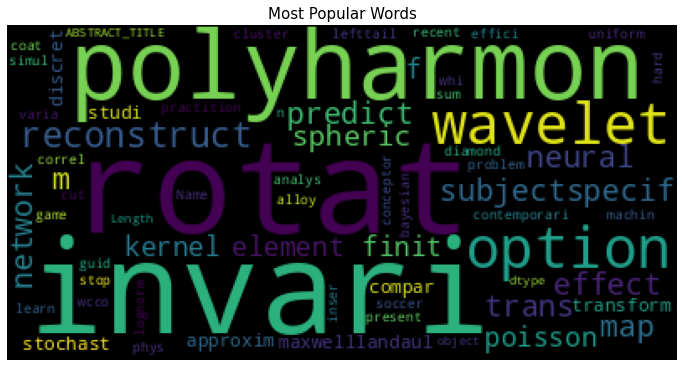

In [ ]:
wordcloud = WordCloud(background_color = 'black').generate(str(df['ABSTRACT_TITLE']))
plt.rcParams['figure.figsize'] = (12, 8)
#print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Words', fontsize = 15)
plt.axis('off')
plt.show()

#TFIDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as sklearn_train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
data=df[{'Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance','ABSTRACT_TITLE'}]
data

,Mathematics,Quantitative Biology,ABSTRACT_TITLE,Physics,Statistics,Computer Science,Quantitative Finance
0,0,0,reconstruct subjectspecif effect map predict m...,0,0,1,0
1,0,0,rotat invari neural network rotat invari trans...,0,0,1,0
2,1,0,spheric polyharmon poisson kernel polyharmon f...,0,0,0,0
3,1,0,finit element approxim stochast maxwelllandaul...,0,0,0,0
4,0,0,compar studi discret wavelet transform wavelet...,0,1,1,0
...,...,...,...,...,...,...,...
20963,0,0,contemporari machin learn guid practition phys...,1,0,1,0
20964,0,0,uniform diamond coat wcco hard alloy cut inser...,1,0,0,0
20965,0,0,analys soccer game cluster conceptor present n...,0,0,1,0
20966,1,0,effici simul lefttail sum correl lognorm varia...,0,1,0,0


In [ ]:
print("\n\nWith TFIDFVectorizer")
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(data.ABSTRACT_TITLE)
print(vectorizer.get_feature_names_out())
print(X.toarray())
print("\n")



print("\n\nWith TFIDFVectorizer and removing stop words")
vectorizer = TfidfVectorizer(stop_words=list(nlp.Defaults.stop_words),max_features=100)
X = vectorizer.fit_transform(data.ABSTRACT_TITLE)
print(vectorizer.get_feature_names_out())
print(X.toarray())
print("\n")




With TFIDFVectorizer
['algorithm' 'also' 'analysi' 'appli' 'applic' 'approach' 'approxim'
 'base' 'bound' 'case' 'compar' 'complex' 'comput' 'condit' 'consid'
 'control' 'data' 'deep' 'demonstr' 'design' 'detect' 'develop' 'differ'
 'distribut' 'dynam' 'effect' 'effici' 'energi' 'equat' 'estim' 'exist'
 'experi' 'featur' 'field' 'find' 'first' 'framework' 'function' 'gener'
 'graph' 'group' 'ha' 'howev' 'imag' 'improv' 'inform' 'interact'
 'introduc' 'larg' 'learn' 'local' 'measur' 'method' 'model' 'network'
 'neural' 'new' 'number' 'observ' 'obtain' 'one' 'onli' 'oper' 'optim'
 'order' 'paper' 'paramet' 'perform' 'point' 'predict' 'present' 'problem'
 'process' 'properti' 'propos' 'provid' 'rate' 'recent' 'result' 'sampl'
 'set' 'show' 'simul' 'solut' 'space' 'state' 'structur' 'studi' 'system'
 'task' 'techniqu' 'test' 'theori' 'thi' 'time' 'train' 'two' 'use' 'well'
 'work']
[[0.06447322 0.05595229 0.         ... 0.32648801 0.         0.        ]
 [0.         0.16701957 0.        

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


['algorithm' 'analysi' 'appli' 'applic' 'approach' 'approxim' 'base'
 'bound' 'case' 'class' 'compar' 'complex' 'comput' 'condit' 'consid'
 'control' 'data' 'deep' 'demonstr' 'design' 'detect' 'develop' 'differ'
 'distribut' 'dynam' 'effect' 'effici' 'energi' 'equat' 'estim' 'exist'
 'experi' 'featur' 'field' 'find' 'framework' 'function' 'gener' 'graph'
 'group' 'ha' 'howev' 'imag' 'improv' 'inform' 'interact' 'introduc'
 'larg' 'learn' 'limit' 'linear' 'local' 'measur' 'method' 'model'
 'network' 'neural' 'new' 'number' 'object' 'observ' 'obtain' 'onli'
 'oper' 'optim' 'order' 'paper' 'paramet' 'perform' 'point' 'predict'
 'present' 'problem' 'process' 'properti' 'propos' 'provid' 'rate'
 'recent' 'relat' 'requir' 'result' 'sampl' 'set' 'simul' 'solut' 'space'
 'state' 'structur' 'studi' 'system' 'task' 'techniqu' 'test' 'theori'
 'thi' 'time' 'train' 'use' 'work']
[[0.06480187 0.         0.         ... 0.16478162 0.32815223 0.        ]
 [0.         0.         0.         ... 0.      

In [ ]:
X= data['ABSTRACT_TITLE']
y=data.drop("ABSTRACT_TITLE", axis=1)
X.head

<bound method NDFrame.head of 0        reconstruct subjectspecif effect map predict m...
1        rotat invari neural network rotat invari trans...
2        spheric polyharmon poisson kernel polyharmon f...
3        finit element approxim stochast maxwelllandaul...
4        compar studi discret wavelet transform wavelet...
                               ...                        
20963    contemporari machin learn guid practition phys...
20964    uniform diamond coat wcco hard alloy cut inser...
20965    analys soccer game cluster conceptor present n...
20966    effici simul lefttail sum correl lognorm varia...
20967    whi option stop problem bayesian recent option...
Name: ABSTRACT_TITLE, Length: 20968, dtype: object>

In [ ]:
y

,Mathematics,Quantitative Biology,Physics,Statistics,Computer Science,Quantitative Finance
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,1,0
...,...,...,...,...,...,...
20963,0,0,1,0,1,0
20964,0,0,1,0,0,0
20965,0,0,0,0,1,0
20966,1,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
y_train

,Mathematics,Quantitative Biology,Physics,Statistics,Computer Science,Quantitative Finance
6052,0,0,0,1,1,0
12359,0,0,1,0,1,0
2966,0,0,1,0,0,0
7472,0,0,1,0,0,0
12761,0,0,1,0,1,0
...,...,...,...,...,...,...
11284,0,1,0,0,0,0
11964,1,0,0,0,0,0
5390,0,0,0,0,0,1
860,0,0,0,0,1,0


In [ ]:
#y_test = y_test.flatten()

In [ ]:
#X_train = X_train.flatten()

In [ ]:
#X_test=X_test.flatten()

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_ = vectorizer.fit_transform(X_train)
X_test_ = vectorizer.transform(X_test)

In [ ]:
import sklearn
lg = sklearn.linear_model.LogisticRegression()

In [ ]:

clf = MultiOutputClassifier(lg)

# Fit the classifier on the training data
clf.fit(X_train_, y_train)

# Use the trained model to predict the labels for the testing data
y_pred = clf.predict(X_test_)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.6278016213638531
F1 score: 0.7817129895645896


In [ ]:
# Create a KNN
from sklearn.neighbors import KNeighborsClassifier
yash=KNeighborsClassifier(n_neighbors=5)
yash.fit(X_train_, y_train)
y_pred = yash.predict(X_test_)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 57.10538865045302


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
sri=DecisionTreeClassifier()
sri.fit(X_train_, y_train)
y_pred = sri.predict(X_test_)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 47.806390081068194


In [ ]:
# Create a Random Forest
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_train_, y_train)
y_pred = rf1.predict(X_test_)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 57.58226037195995


In [ ]:
# Create a XG Boost
import xgboost as xgb
from xgboost import XGBClassifier
xgb_boost1 = XGBClassifier()
xgb_boost1.fit(X_train_, y_train)
y_pred = xgb_boost1.predict(X_test_)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 61.27801621363853


#WORD2VEC

In [ ]:
from gensim.models import Word2Vec
sentences = [review.split() for review in data['ABSTRACT_TITLE']]
model = Word2Vec(sentences,size=100,window=5,min_count=1,workers=4)
model.save('word2vec.model')

In [ ]:
# Convert each word to vector and represent the sentence in vector form using the word embeddings
def sentence_vector(sentence,model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv.vocab]
    if len(word_vectors) == 0:
        return np.zeros((100,))
    return np.mean(word_vectors, axis=0)

In [ ]:
# Convert each sentence in the dataset to a vector using the Word2Vec model
word2vec_train = np.array([sentence_vector(sentence, model) for sentence in data['ABSTRACT_TITLE']])
word2vec_test = np.array(y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(word2vec_train,word2vec_test,test_size=0.35,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lg1 = LogisticRegression()

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
model1 =  MultiOutputClassifier(lg1)
# Train the model on the training set
model1.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

MultiOutputClassifier(estimator=LogisticRegression())

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model1.predict(X_test))*100))

Accuracy on test data: 63.7%


In [ ]:
targets=['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']

In [ ]:
# Create a KNN
from sklearn.neighbors import KNeighborsClassifier
yash=KNeighborsClassifier(n_neighbors=5)
yash.fit(X_train, y_train)
y_pred = yash.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 63.65989916882408


In [ ]:

from sklearn.tree import DecisionTreeClassifier 
sri=DecisionTreeClassifier()
sri.fit(X_train, y_train)
y_pred = sri.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 53.971930780760324


In [ ]:
# Create a Random Forest
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 64.85897261207249


In [ ]:
#y_test.ndim

2

In [ ]:
# Create a XG Boost
import xgboost as xgb
from xgboost import XGBClassifier
xgb_boost1 = XGBClassifier()
xgb_boost1.fit(X_train, y_train)
y_pred = xgb_boost1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 64.25943589044829


In [ ]:
#Using MultinomialNB one at a time on tf_idf
for t in targets:

    #y_train=tr[t]
    #y_test=ev[t]

    #using MultinomialNB
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)
    
    ev_pred[t] = classifier.predict(xvalid_tfv)
    test_pred[t] = classifier.predict(xtest_tfv)

for t in targets:
    print(t)
    print(f1_score(ev[t],ev_pred[t]))

output = pd.DataFrame({'ID': test['ID'], 'Computer Science':test_pred['Computer Science'],'Physics':test_pred['Physics'],'Mathematics':test_pred['Mathematics'],'Statistics':test_pred['Statistics'],'Quantitative Biology':test_pred['Quantitative Biology'],'Quantitative Finance':test_pred['Quantitative Finance'] })
#output.to_csv('tf_idf_mnb.csv', index=False)
#print("Your submission was successfully saved!")

output

#COMBINING TFIDF AND WORD2VEC


In [ ]:
def combine_vectors(doc):
    tfidf_vec = vectorizer.transform([doc])
    w2v_vec = sentence_vector(doc, model)
    combined_vec = np.concatenate([np.squeeze(tfidf_vec.toarray()), w2v_vec])
    return combined_vec

In [ ]:
combined_train = np.array([combine_vectors(doc) for doc in data['ABSTRACT_TITLE']])
combined_test = np.array(y)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_train, combined_test, test_size=0.30, random_state=42)

In [ ]:
# Create a logistic regression object
lr3 = LogisticRegression()

In [ ]:
model3 =  MultiOutputClassifier(lr3)

In [ ]:
# Fit the model to the training data
model3.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

MultiOutputClassifier(estimator=LogisticRegression())

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model3.predict(X_test))*100))

Accuracy on test data: 64.8%


In [ ]:
# Create a KNN
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 64.50470091293091


In [ ]:
# Create a Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier()
tree1.fit(X_train, y_train)
y_pred = tree1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 54.68047417904347


In [ ]:
# Create a Random Forest
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 64.50470091293091


In [ ]:
# Create a XG Boost
import xgboost as xgb
from xgboost import XGBClassifier
xgb_boost1 = XGBClassifier()
xgb_boost1.fit(X_train, y_train)
y_pred = xgb_boost1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 65.44269591479892
